In [108]:
import requests
import xmltodict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
xml = """<search-request>
    <impulse-class>L</impulse-class>
    <max-results>200</max-results>
</search-request>"""

In [75]:
xml

'<search-request>\n    <impulse-class>L</impulse-class>\n    <max-results>200</max-results>\n</search-request>'

In [76]:
url = 'http://www.thrustcurve.org/servlets/search'

In [77]:
response = requests.post(url, data=xml)

In [78]:
print(response.text)

<?xml version="1.0" encoding="ISO-8859-1"?>
<search-response xmlns="http://www.thrustcurve.org/2015/SearchResponse" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.thrustcurve.org/2015/SearchResponse http://www.thrustcurve.org/2015/search-response.xsd">
<criteria>
<criterion>
<name>impulse-class</name>
<value>L</value>
<matches>112</matches>
</criterion>
<matches>112</matches>
</criteria>
<results>
<result>
<motor-id>361</motor-id>
<manufacturer>Hypertek</manufacturer>
<manufacturer-abbrev>Hypertek</manufacturer-abbrev>
<designation>1685CC098L - L200</designation>
<brand-name>1685CC098L - L200</brand-name>
<common-name>L200</common-name>
<impulse-class>L</impulse-class>
<diameter>75.0</diameter>
<length>1031.0</length>
<type>hybrid</type>
<cert-org>Tripoli Rocketry Association, Inc.</cert-org>
<avg-thrust-n>200.0</avg-thrust-n>
<tot-impulse-ns>2639.3</tot-impulse-ns>
<burn-time-s>13.1965</burn-time-s>
<data-files>3</data-files>
<info-url>http://www.

112

In [79]:
mydict = xmltodict.parse(response.text)

In [80]:
motors = mydict['search-response']['results']['result']

In [180]:
def get_motors_of_class(c):
    xml = f"""<search-request>
    <impulse-class>{c}</impulse-class>
    <max-results>200</max-results>
</search-request>"""
    
    url = 'http://www.thrustcurve.org/servlets/search'
    
    response = requests.post(url, data=xml)
    
    mydict = xmltodict.parse(response.text)
    
    num_of_matches = int(mydict['search-response']['criteria']['matches'])
    
    motors = mydict['search-response']['results']['result']
    
    if num_of_matches != len(motors):
        print(f'Class: {c}: {num_of_matches} but only {len(motors)} returned')
    else:
        print(f'Class: {c}: {num_of_matches} found!')
        
    return motors

Class: A: 16 found!


In [194]:
df = pd.DataFrame()

In [211]:
classes = ['A','B','C','D','E','F','G','H','I',"J","K","L","M","N","O"]

for c in classes:
    motors = get_motors_of_class(c)
    for motor in motors:
        try:
            df = df.append(motor,ignore_index=True)
        except:
            pass

Class: A: 16 found!
Class: B: 8 found!
Class: C: 10 found!
Class: D: 16 found!
Class: E: 23 found!
Class: F: 56 found!
Class: G: 90 found!
Class: H: 108 found!
Class: I: 138 found!
Class: J: 172 found!
Class: K: 161 found!
Class: L: 112 found!
Class: M: 118 found!
Class: N: 33 found!
Class: O: 11 found!


In [212]:

len(df)

1122

In [213]:
df.columns

Index(['availability', 'avg-thrust-n', 'brand-name', 'burn-time-s', 'cert-org',
       'common-name', 'data-files', 'delays', 'designation', 'diameter',
       'impulse-class', 'info-url', 'length', 'manufacturer',
       'manufacturer-abbrev', 'max-thrust-n', 'motor-id', 'prop-info',
       'prop-weight-g', 'tot-impulse-ns', 'total-weight-g', 'type',
       'updated-on', 'case-info', 'sparky'],
      dtype='object')

In [214]:
df.head()

,availability,avg-thrust-n,brand-name,burn-time-s,cert-org,common-name,data-files,delays,designation,diameter,...,max-thrust-n,motor-id,prop-info,prop-weight-g,tot-impulse-ns,total-weight-g,type,updated-on,case-info,sparky
0,regular,0.284,Micro Maxx II,0.772,National Association of Rocketry,Micro Maxx,3,1,Micro Maxx II,6.0,...,2.108,1,black powder,0.5,0.218,1.0,SU,2019-04-16,NaN,NaN
1,OOP,0.163,Micro Maxx,0.827,National Association of Rocketry,Micro Maxx,2,1,Micro Maxx,6.0,...,1.898,2,black powder,0.4,0.135,1.07,SU,2019-04-16,NaN,NaN
2,OOP,2.48,1/4A2,0.23,National Association of Rocketry,1/4A2,2,"2,4",1/4A2,10.5,...,5.4,3,NaN,0.75,0.57,NaN,SU,2019-04-16,NaN,NaN
3,regular,2.36,1/4A3,0.25,National Association of Rocketry,1/4A3,2,3,1/4A3,13.0,...,4.95,4,black powder,0.83,0.59,NaN,SU,2019-04-16,NaN,NaN
4,OOP,1.94,1/2A2,0.63,National Association of Rocketry,1/2A2,2,"2,4,6",1/2A2,10.5,...,3.97,5,NaN,1.5,1.22,NaN,SU,2019-04-16,NaN,NaN


In [215]:
summary = df[['common-name','impulse-class', 'length', 'diameter', 'prop-weight-g', 'total-weight-g', 'max-thrust-n','avg-thrust-n', 'burn-time-s','tot-impulse-ns']]
cols = summary.columns
summary[cols] = summary[cols].apply(pd.to_numeric, errors='ignore')

/Users/Devansh/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [216]:
summary.head()

,common-name,impulse-class,length,diameter,prop-weight-g,total-weight-g,max-thrust-n,avg-thrust-n,burn-time-s,tot-impulse-ns
0,Micro Maxx,A,26.0,6.0,0.50,1.00,2.108,0.284,0.772,0.218
1,Micro Maxx,A,26.0,6.0,0.40,1.07,1.898,0.163,0.827,0.135
2,1/4A2,A,38.0,10.5,0.75,NaN,5.400,2.480,0.230,0.570
3,1/4A3,A,45.0,13.0,0.83,NaN,4.950,2.360,0.250,0.590
4,1/2A2,A,38.0,10.5,1.50,NaN,3.970,1.940,0.630,1.220


In [218]:
summary['prop_mass_fraction'] = summary['prop-weight-g']/(summary['prop-weight-g']+summary['total-weight-g'])

/Users/Devansh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1281c9e10>]],
      dtype=object)

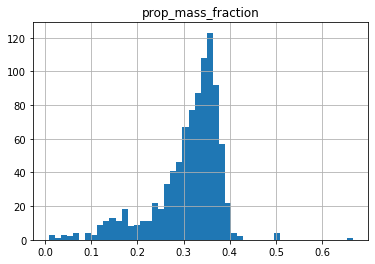

In [267]:
summary.hist(column='prop_mass_fraction',bins=50)

In [271]:
summary['prop_mass_fraction'].describe()

count    925.000000
mean       0.309567
std        0.074406
min        0.007842
25%        0.283922
50%        0.330058
75%        0.358366
max        0.666667
Name: prop_mass_fraction, dtype: float64

In [285]:
#therefore, propellant mass fraction of the motor is ~30%
prop_mass_fraction = summary['prop_mass_fraction'].median()
print(prop_mass_fraction)

0.3300578812760802


<Figure size 432x288 with 0 Axes>

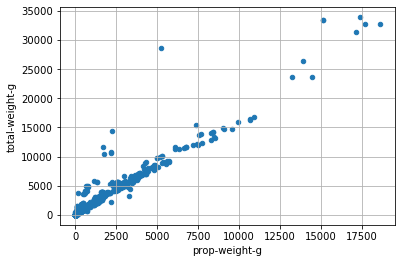

In [272]:
plots = ['prop-weight-g', 'total-weight-g','tot-impulse-ns','impulse-class']

cleaned = summary[plots].dropna()
plt.figure()

cleaned.plot.scatter(x=0,y=1)
plt.grid()


<Figure size 432x288 with 0 Axes>

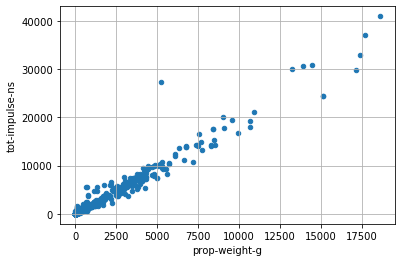

In [273]:
plots = ['prop-weight-g', 'total-weight-g','tot-impulse-ns','impulse-class']

cleaned = summary[plots].dropna()
plt.figure()

cleaned.plot.scatter(x=0,y=2)
plt.grid()

In [274]:
#very well correlated, as it should be. estimate the specific impulse from this data
summary['c-m/s'] = 1000*summary['tot-impulse-ns']/summary['prop-weight-g']

/Users/Devansh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [275]:
summary['c-m/s'].describe()

count      1107.000000
mean       2163.373276
std        4934.354750
min         238.461538
25%        1691.058175
50%        1868.337655
75%        2043.148817
max      155279.069767
Name: c-m/s, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1297e6198>]],
      dtype=object)

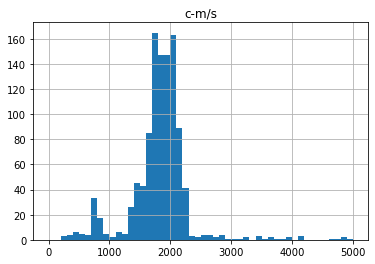

In [279]:
summary.hist(column='c-m/s', bins=50, range=(0,5000))

In [284]:
c = summary['c-m/s'].median()
print(f'Therefore, use exhaust velocity of {c} m/s')

Therefore, use exhaust velocity of 1868.3376548545086 m/s


<Figure size 432x288 with 0 Axes>

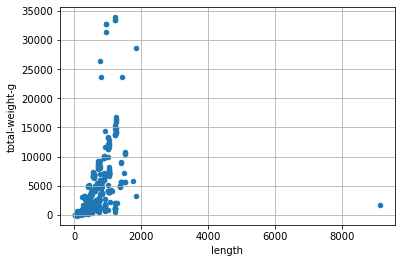

In [231]:
plots = ['length', 'total-weight-g']

cleaned = summary[plots].dropna()
plt.figure()

cleaned.plot.scatter(0,1)
plt.grid()

<Figure size 432x288 with 0 Axes>

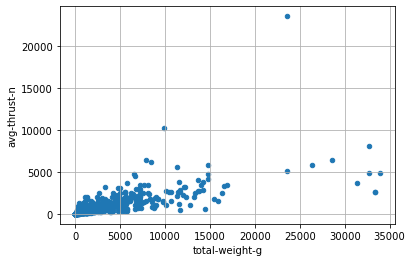

In [286]:
plots = [ 'total-weight-g', 'avg-thrust-n']

cleaned = summary[plots].dropna()
plt.figure()

cleaned.plot.scatter(0,1)
plt.grid()

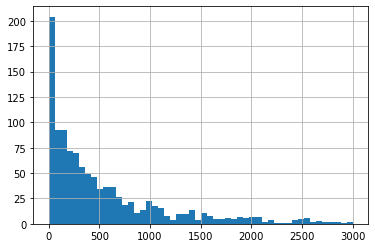

In [291]:
summary['avg-thrust-n'].hist(bins=50, range=(0,3000))

<Figure size 1080x1080 with 0 Axes>

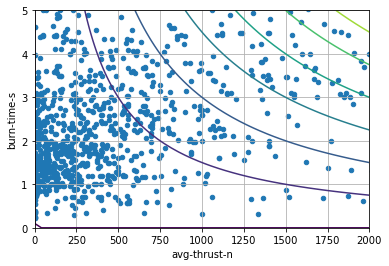

In [313]:
import numpy as np

plt.figure(figsize=(15,15))
summary.plot.scatter(x='avg-thrust-n',y='burn-time-s')

xrange = np.linspace(0,2000)
yrange = np.linspace(0,5)
xv, yv = np.meshgrid(xrange, yrange)

plt.contour(xv,yv,xv*yv)

plt.xlim(np.amin(xv),np.amax(xv))
plt.ylim(np.amin(yv),np.amax(yv))

plt.grid()

/Users/Devansh/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Devansh/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


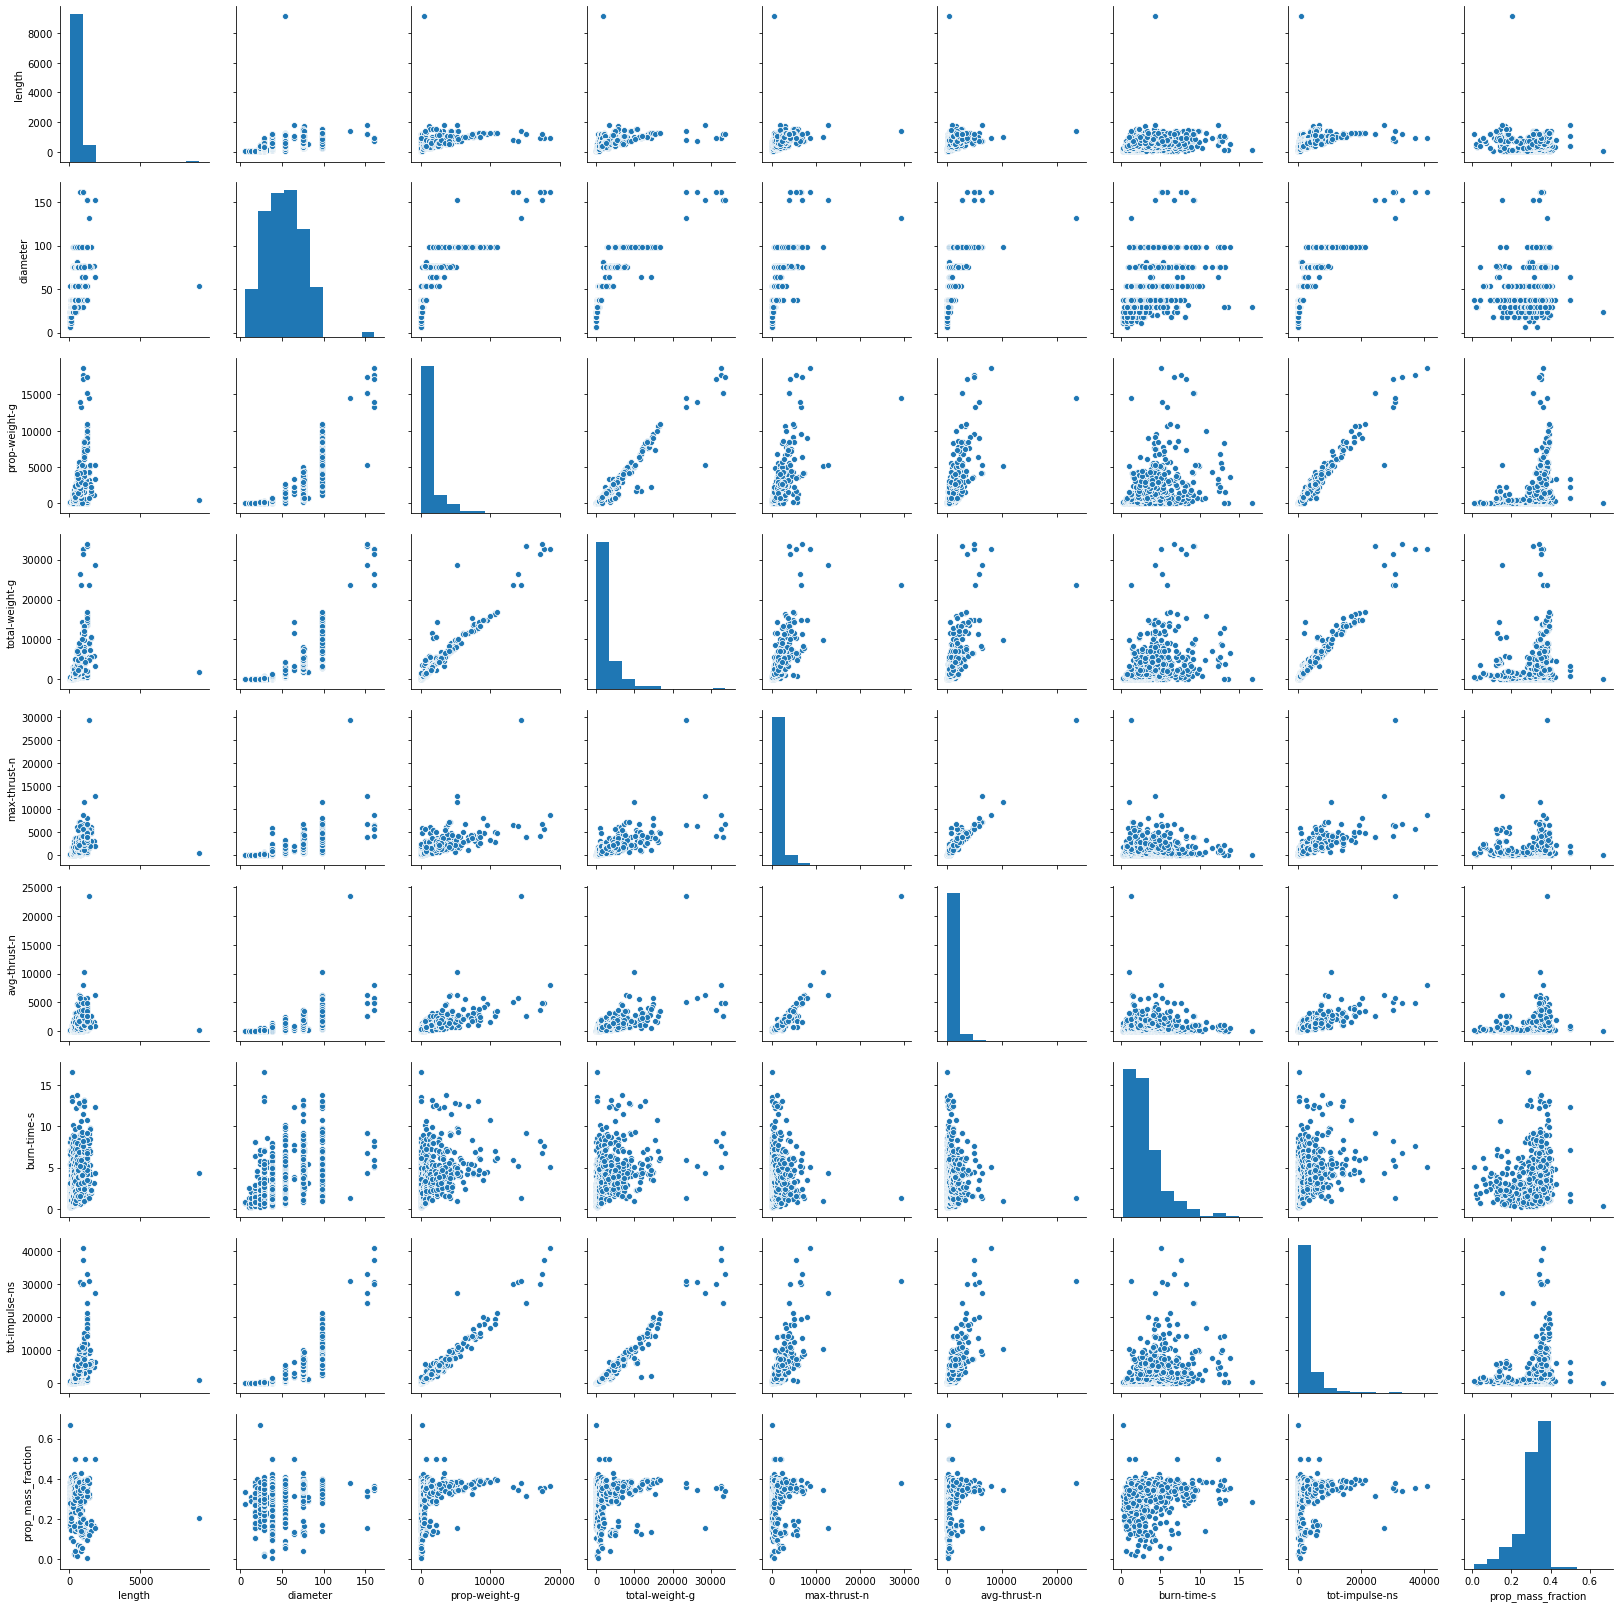

In [242]:
sns.pairplot(summary)

In [243]:
summary.corr()

,length,diameter,prop-weight-g,total-weight-g,max-thrust-n,avg-thrust-n,burn-time-s,tot-impulse-ns,prop_mass_fraction
length,1.000000,0.567901,0.482135,0.499750,0.497673,0.410018,0.373246,0.495010,-0.024455
diameter,0.567901,1.000000,0.813287,0.848437,0.689449,0.657843,0.527437,0.818118,0.251590
prop-weight-g,0.482135,0.813287,1.000000,0.965382,0.713131,0.734920,0.445106,0.980806,0.314640
total-weight-g,0.499750,0.848437,0.965382,1.000000,0.727830,0.716900,0.432384,0.971228,0.193263
max-thrust-n,0.497673,0.689449,0.713131,0.727830,1.000000,0.958308,0.158252,0.769598,0.135698
avg-thrust-n,0.410018,0.657843,0.734920,0.716900,0.958308,1.000000,0.108836,0.774901,0.223812
burn-time-s,0.373246,0.527437,0.445106,0.432384,0.158252,0.108836,1.000000,0.425585,0.190897
tot-impulse-ns,0.495010,0.818118,0.980806,0.971228,0.769598,0.774901,0.425585,1.000000,0.258796
prop_mass_fraction,-0.024455,0.251590,0.314640,0.193263,0.135698,0.223812,0.190897,0.258796,1.000000


In [265]:

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(summary.select_dtypes(include='float64'), 10))

Top Absolute Correlations
prop-weight-g   tot-impulse-ns    0.980806
total-weight-g  tot-impulse-ns    0.971228
prop-weight-g   total-weight-g    0.965382
max-thrust-n    avg-thrust-n      0.958308
diameter        total-weight-g    0.848437
                tot-impulse-ns    0.818118
                prop-weight-g     0.813287
avg-thrust-n    tot-impulse-ns    0.774901
max-thrust-n    tot-impulse-ns    0.769598
prop-weight-g   avg-thrust-n      0.734920
dtype: float64
